<a href="https://colab.research.google.com/github/magarthur/Mines/blob/main/RNN_Analyse_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/magarthur/Mines.git


fatal: destination path 'Mines' already exists and is not an empty directory.


In [3]:
import os
os.listdir("Mines")

['bike_daily.csv', '.git', 'data_propre.csv', 'README.md']

In [4]:
# On affiche les 5 premières lignes du dataset
data = pd.read_csv("Mines/bike_daily.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print(data.head().to_latex())

\begin{tabular}{lrlrrrrrrrrrrrrrr}
\toprule
 & instant & dteday & season & yr & mnth & holiday & weekday & workingday & weathersit & temp & atemp & hum & windspeed & casual & registered & cnt \\
\midrule
0 & 1 & 2011-01-01 & 1 & 0 & 1 & 0 & 6 & 0 & 2 & 0.344167 & 0.363625 & 0.805833 & 0.160446 & 331 & 654 & 985 \\
1 & 2 & 2011-01-02 & 1 & 0 & 1 & 0 & 0 & 0 & 2 & 0.363478 & 0.353739 & 0.696087 & 0.248539 & 131 & 670 & 801 \\
2 & 3 & 2011-01-03 & 1 & 0 & 1 & 0 & 1 & 1 & 1 & 0.196364 & 0.189405 & 0.437273 & 0.248309 & 120 & 1229 & 1349 \\
3 & 4 & 2011-01-04 & 1 & 0 & 1 & 0 & 2 & 1 & 1 & 0.200000 & 0.212122 & 0.590435 & 0.160296 & 108 & 1454 & 1562 \\
4 & 5 & 2011-01-05 & 1 & 0 & 1 & 0 & 3 & 1 & 1 & 0.226957 & 0.229270 & 0.436957 & 0.186900 & 82 & 1518 & 1600 \\
\bottomrule
\end{tabular}



In [6]:
#on supprime la première colonne car doublon
data.drop('instant', axis=1, inplace=True)

In [7]:
#on vérifie que la première colonne a bien été supprimé.
data.head(-5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013


In [8]:
for col in data.columns:
    print(f"Colonne: {col}")
    print(f"  Type: {data[col].dtype}")                     # Type de la colonne
    print(f"  Valeurs manquantes: {data[col].isna().sum()}")  # Nombre de valeurs manquantes
    print("-" * 40)

#On remarquera (voir sortie code ci-dessous) l'absence de données NAN dans le dataset.
#Dans la suite, on essaye de déterminer la présence ou non de données aberrantes.

Colonne: dteday
  Type: object
  Valeurs manquantes: 0
----------------------------------------
Colonne: season
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: yr
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: mnth
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: holiday
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: weekday
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: workingday
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: weathersit
  Type: int64
  Valeurs manquantes: 0
----------------------------------------
Colonne: temp
  Type: float64
  Valeurs manquantes: 0
----------------------------------------
Colonne: atemp
  Type: float64
  Valeurs manquantes: 0
----------------------------------------
Colonne: hum
  Type: float64
  Valeurs manqu

In [9]:
"""
on sépare les colonnes en trois types :
  -catégorielles
  -continues
  -Nombre de vélos utilisés
"""
L1 = ['season','yr','mnth', 'holiday','weekday','workingday','weathersit']
L2 = [('temp',41),('atemp',50),('hum',100),('windspeed',64)]
L3 = ['casual','registered','cnt']

In [10]:
#alcul des statistiques
tableau_stats = data[L3].describe()

# Affichage du tableau
print(tableau_stats.round(2))

        casual  registered      cnt
count   731.00      731.00   731.00
mean    848.18     3656.17  4504.35
std     686.62     1560.26  1937.21
min       2.00       20.00    22.00
25%     315.50     2497.00  3152.00
50%     713.00     3662.00  4548.00
75%    1096.00     4776.50  5956.00
max    3410.00     6946.00  8714.00


In [11]:
print(data[data['weathersit'] == 3])
"""
on retrouve ici la valeur cnt = 22. Après recherche sur internet,
on apprend qu'il y a eu un ouragan le 29 octobre 2012 à Washington DC. Par sécurité, l'accès aux vélos avaient été fermé.
On va donc changer cette valeur par la moyenne des jours similaires (même mois, même workingday et même weathersit)
"""

         dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
25   2011-01-26       1   0     1        0        3           1           3   
68   2011-03-10       1   0     3        0        4           1           3   
89   2011-03-31       2   0     3        0        4           1           3   
105  2011-04-16       2   0     4        0        6           0           3   
248  2011-09-06       3   0     9        0        2           1           3   
249  2011-09-07       3   0     9        0        3           1           3   
250  2011-09-08       3   0     9        0        4           1           3   
284  2011-10-12       4   0    10        0        3           1           3   
291  2011-10-19       4   0    10        0        3           1           3   
301  2011-10-29       4   0    10        0        6           0           3   
319  2011-11-16       4   0    11        0        3           1           3   
324  2011-11-21       4   0    11        0        1 

"\non retrouve ici la valeur cnt = 22. Après recherche sur internet, \non apprend qu'il y a eu un ouragan le 29 octobre 2012 à Washington DC. Par sécurité, l'accès aux vélos avaient été fermé.\nOn va donc changer cette valeur par la moyenne des jours similaires (même mois, même workingday et même weathersit)\n"

In [12]:
data1 = data.copy()

# On stocke les indices des lignes concernées pour pouvoir les modifier plus tard
indices_anomalie = data1[data1['cnt'] == 22].index

# On cherche les jours similaires (Mois 10, Travaillé, Mauvaise Météo)
masque_reference = (
    (data1['mnth'] == 10) &
    (data1['workingday'] == 1) &
    (data1['weathersit'] == 3) &
    (data1['cnt'] != 22)
)

#Calcul des moyennes casual et registered
moyenne_casual = data1.loc[masque_reference, 'casual'].mean()
moyenne_registered = data1.loc[masque_reference, 'registered'].mean()

print(f"Moyenne Casual: {moyenne_casual:.2f}")
print(f"Moyenne Registered: {moyenne_registered:.2f}")

# On remplace casual et registered par leurs moyennes respectives
data1.loc[indices_anomalie, 'casual'] = int(moyenne_casual)
data1.loc[indices_anomalie, 'registered'] = int(moyenne_registered)

# Calcul de cnt
data1.loc[indices_anomalie, 'cnt'] = data1.loc[indices_anomalie, 'casual'] + data1.loc[indices_anomalie, 'registered']

# Vérification du résultat
print("\n valeurs corrigées :")
print(data1.loc[indices_anomalie, ['dteday', 'casual', 'registered', 'cnt']])

Moyenne Casual: 262.00
Moyenne Registered: 2897.67

 valeurs corrigées :
         dteday  casual  registered   cnt
667  2012-10-29     262        2897  3159


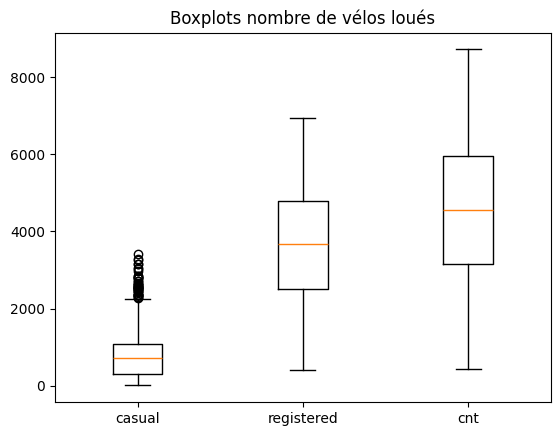

In [13]:
#boxplot des variables continues
plt.boxplot([data1[c] for c in L3], tick_labels=L3)
plt.title('Boxplots nombre de vélos loués')
plt.savefig("vélosloues.png")
plt.show()

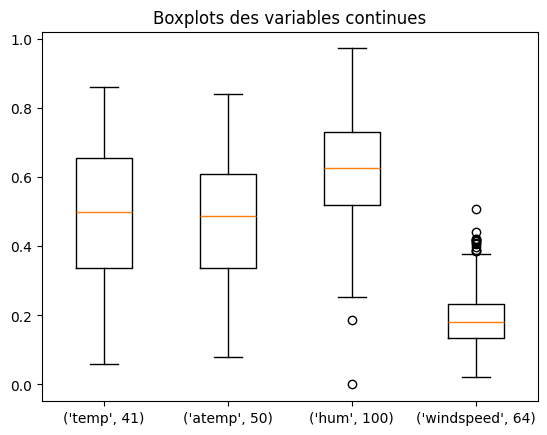

In [14]:
#boxplot des variables continues
plt.boxplot([data1[c[0]] for c in L2], tick_labels=L2)
plt.title('Boxplots des variables continues')
plt.savefig("continues.png")
plt.show()


In [15]:
#Pour hum, il exite au moins une valeur nulle --> impossible. On va donc changer la valeur avec la moyenne du mois de la même année.

In [16]:
indices = data.index[data['hum'] == 0].tolist()
print(data.loc[indices])

        dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
68  2011-03-10       1   0     3        0        4           1           3   

        temp     atemp  hum  windspeed  casual  registered  cnt  
68  0.389091  0.385668  0.0   0.261877      46         577  623  


In [17]:
data2 = data1.copy()

In [18]:
# Traitement de la donnée aberrante
data2.loc[indices, 'hum'] = np.nan  #Pour ne pas prendre en compte le 0 dans la moyenne.
for idx in indices:
    mean_value = data2.loc[
        (data2['yr'] == data2.loc[idx, 'yr']) &
        (data2['mnth'] == data2.loc[idx, 'mnth']),
        'hum'
    ].mean()

    data2.loc[idx, 'hum'] = mean_value    # on remplace les valeurs NA par la moyenne du mois de la même année.

print(data2.loc[indices])

        dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
68  2011-03-10       1   0     3        0        4           1           3   

        temp     atemp       hum  windspeed  casual  registered  cnt  
68  0.389091  0.385668  0.588394   0.261877      46         577  623  


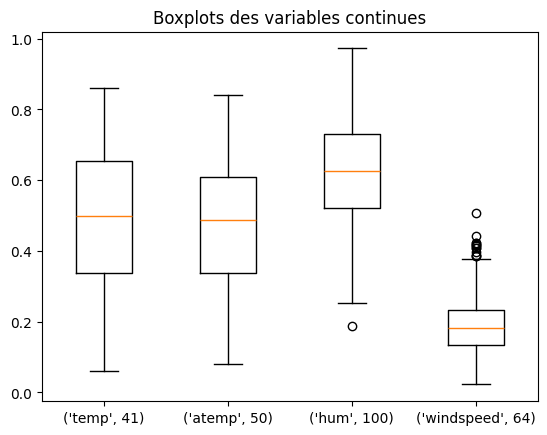

In [19]:
#boxplot des variables continues traitées
plt.boxplot([data2[c[0]] for c in L2], tick_labels=L2)
plt.title('Boxplots des variables continues')
plt.show()

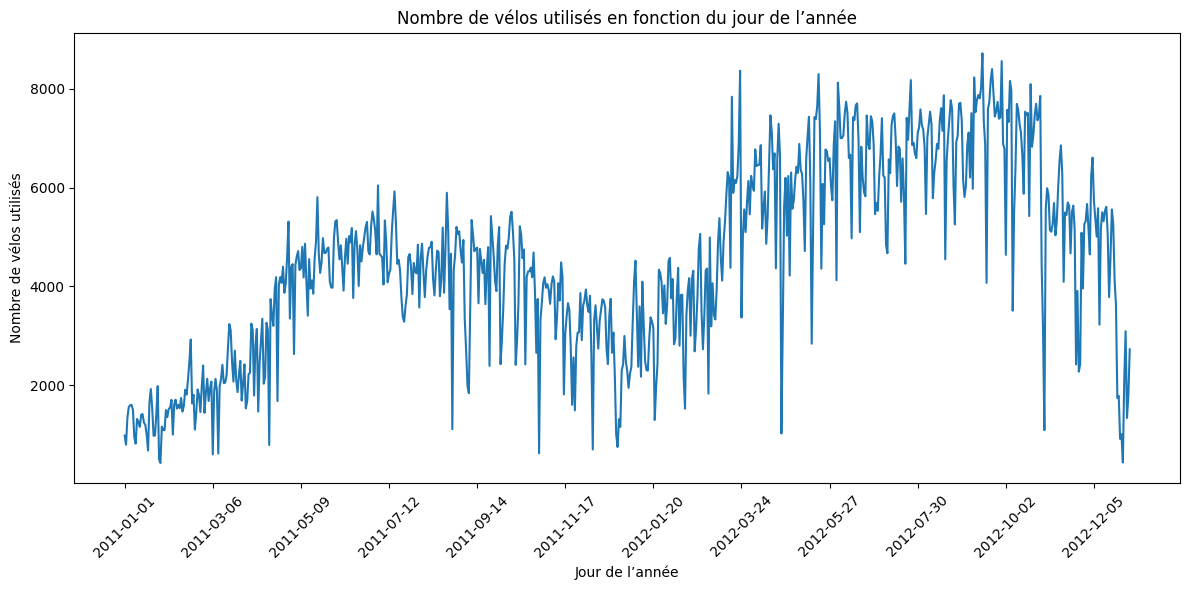

In [20]:
#affiche le nombre de vélos utilisés sur tout le dataset

plt.figure(figsize=(12,6))
plt.plot(data2['dteday'], data2['cnt'])  # points
plt.xlabel('Jour de l’année')
plt.ylabel('Nombre de vélos utilisés')
plt.title('Nombre de vélos utilisés en fonction du jour de l’année')
plt.xticks(range(0, len(data2['dteday']), 64), data2['dteday'][0::64], rotation =45)
plt.tight_layout()
plt.savefig("bikeused.png")
plt.show()

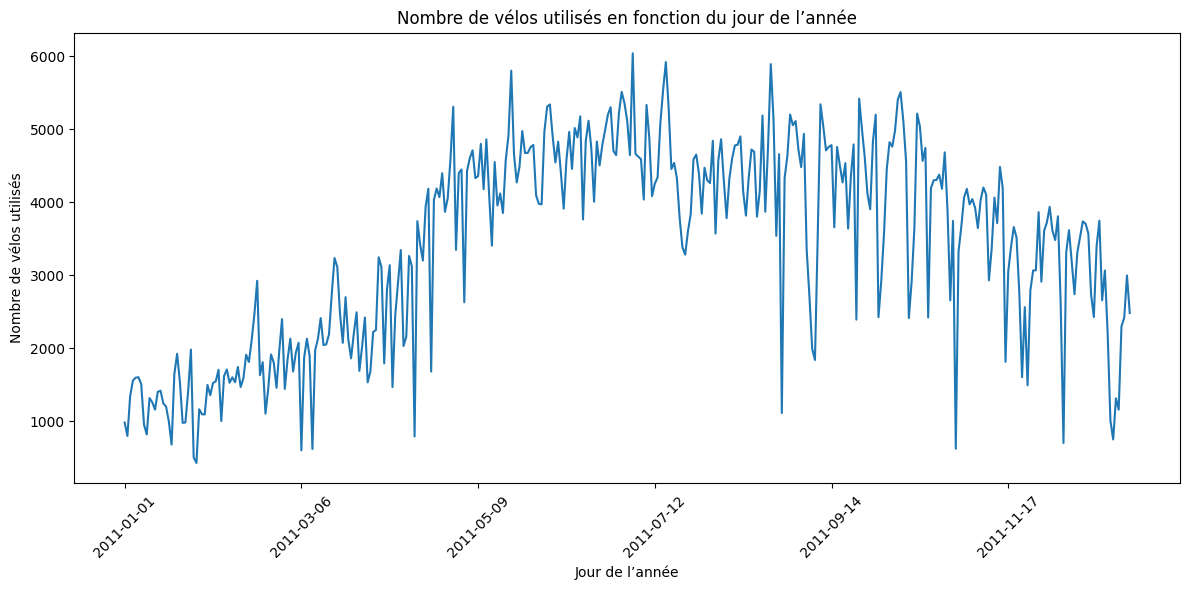

In [21]:
#affiche le nombre de vélos utilisés sur la première année
data3 = data2.iloc[: 365]
plt.figure(figsize=(12,6))
plt.plot(data3['dteday'], data3['cnt'])  # points
plt.xlabel('Jour de l’année')
plt.ylabel('Nombre de vélos utilisés')
plt.title('Nombre de vélos utilisés en fonction du jour de l’année')
plt.xticks(range(0, len(data3['dteday']), 64), data3['dteday'][0::64], rotation =45)
plt.tight_layout()
plt.show()

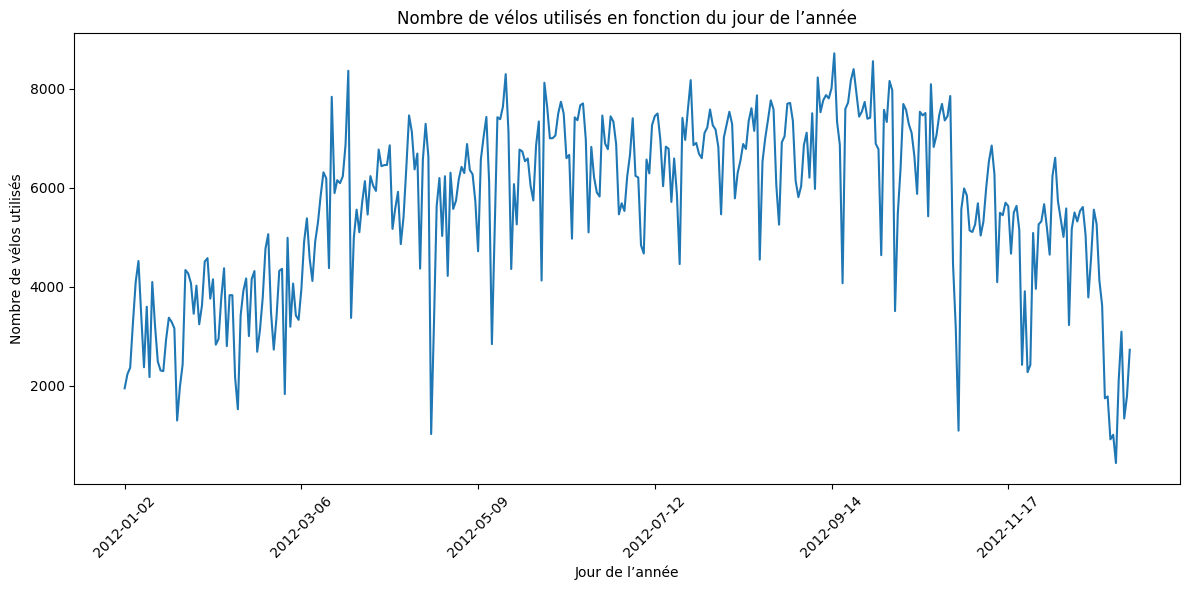

In [22]:
#Affiche le nombre de vélos utilisés sur la deuxième année.
data4 = data2.iloc[366:]
plt.figure(figsize=(12,6))
plt.plot(data4['dteday'], data4['cnt'])  # points
plt.xlabel('Jour de l’année')
plt.ylabel('Nombre de vélos utilisés')
plt.title('Nombre de vélos utilisés en fonction du jour de l’année')
plt.xticks(range(0, len(data4['dteday']), 64), data4['dteday'][0::64], rotation =45)
plt.tight_layout()
plt.show()

In [23]:
# téléchargelent du dataset nettoyé de ses valeurs aberrantes
from google.colab import files

data2.to_csv('data_propre.csv', index=False)
files.download('data_propre.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

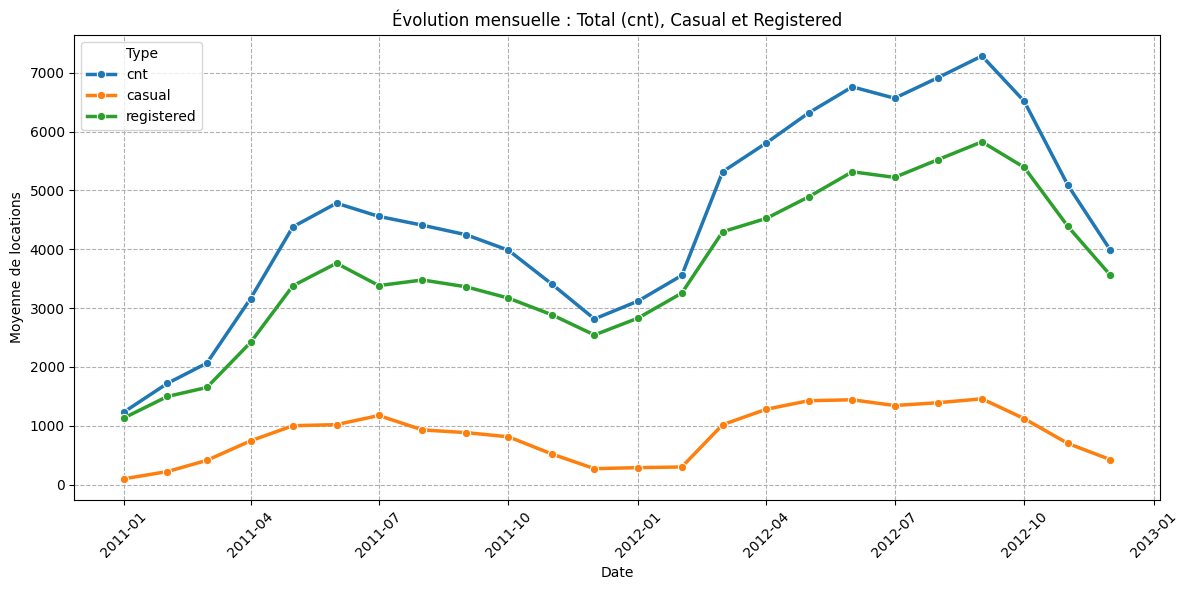

In [24]:
# affiche la moyenne des vélos utilisés par mois (Total, Casual, Registered)

data5 = data2.copy() # on copie data 2 pour ne pas le modifier

# On ajoute 2011 car le dataset commence en 2011 pour l'année 0
data5['annee_reelle'] = data5['yr'] + 2011

# On groupe par l'année et le mois, et on fait la moyenne pour les 3 colonnes
data_mensuel = data5.groupby(['annee_reelle', 'mnth'])[['cnt', 'casual', 'registered']].mean().reset_index()

# On crée un dataframe temporaire avec des dates pour plot
dates_temp = pd.DataFrame({
    'year': data_mensuel['annee_reelle'],
    'month': data_mensuel['mnth'],
    'day': 1
})

data_mensuel['date_graphique'] = pd.to_datetime(dates_temp)

data_long = data_mensuel.melt(
    id_vars=['date_graphique'],
    value_vars=['cnt', 'casual', 'registered'],
    var_name='Type',
    value_name='Nombre'
)

#Affichage du graphique
plt.figure(figsize=(12, 6))

sns.lineplot(data=data_long, x='date_graphique', y='Nombre', hue='Type', marker='o', linewidth=2.5)

plt.title('Évolution mensuelle : Total (cnt), Casual et Registered')
plt.xlabel('Date')
plt.ylabel('Moyenne de locations')
plt.grid(True, linestyle='--', alpha=1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthbikesused.png")
plt.show()

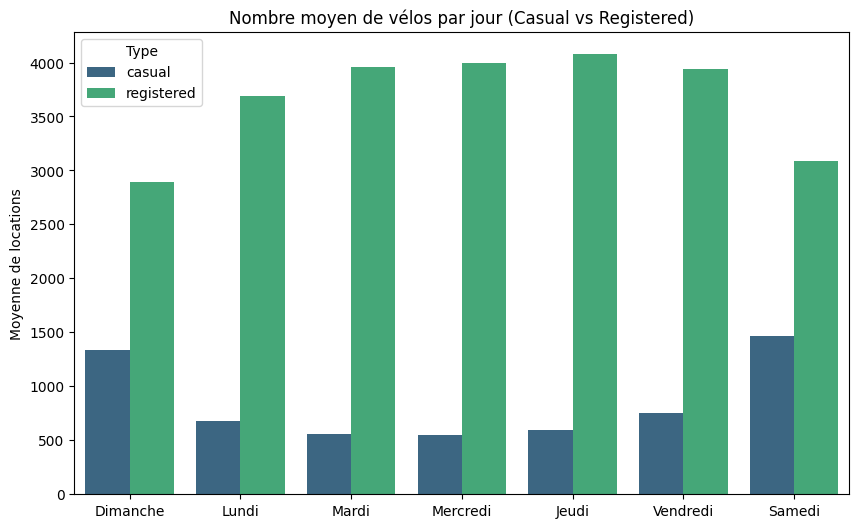

In [25]:
#affiche la moyenne des vélos utilisés par semaine

#Calcul des moyennes pour les deux colonnes
data_hebdo = data5.groupby('weekday')[['casual', 'registered']].mean().reset_index()

#Dico
jours_noms = {
    0: 'Dimanche', 1: 'Lundi', 2: 'Mardi', 3: 'Mercredi',
    4: 'Jeudi', 5: 'Vendredi', 6: 'Samedi'
}

data_hebdo['nom_jour'] = data_hebdo['weekday'].map(jours_noms)

data_melted = data_hebdo.melt(
    id_vars=['nom_jour'],
    value_vars=['casual', 'registered'],
    var_name='Type',
    value_name='Moyenne'
)

#graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data_melted,
    x='nom_jour',
    y='Moyenne',
    hue='Type',
    palette='viridis'
)

plt.xlabel('')
plt.title('Nombre moyen de vélos par jour (Casual vs Registered)')
plt.ylabel('Moyenne de locations')
plt.savefig("cas_reg_by_day.png")
plt.show()

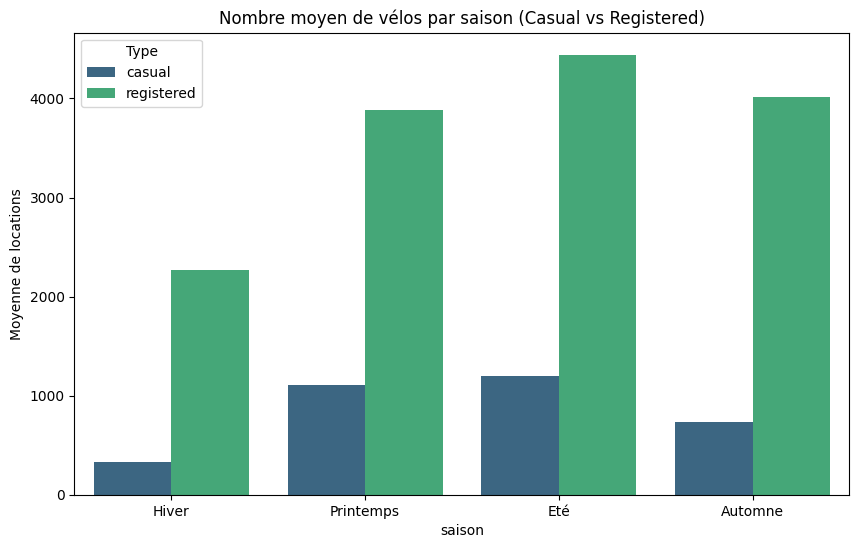

In [26]:
#affiche la moyenne des vélos utilisés par saison (Casual vs Registered)

#Calcul de la moyenne par saison pour casual et registered
data_saison = data5.groupby('season')[['casual', 'registered']].mean().reset_index()

#Dictionnaire pour renommer les saisons
saisons_noms = {
    1: 'Hiver', 2: 'Printemps', 3: 'Eté', 4: 'Automne'
}

# On applique le dictionnaire pour créer une colonne lisible
data_saison['nom_saison'] = data_saison['season'].map(saisons_noms)

# On transforme les données pour l'affichage groupé (melt)
data_melted = data_saison.melt(
    id_vars=['nom_saison'],
    value_vars=['casual', 'registered'],
    var_name='Type',
    value_name='Moyenne'
)

#Graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data_melted,
    x='nom_saison',
    y='Moyenne',
    hue='Type', # C'est ici qu'on sépare les barres
    palette='viridis'
)

plt.xlabel('saison')
plt.title('Nombre moyen de vélos par saison (Casual vs Registered)')
plt.ylabel('Moyenne de locations')
plt.savefig("cas_reg_season.png")
plt.show()

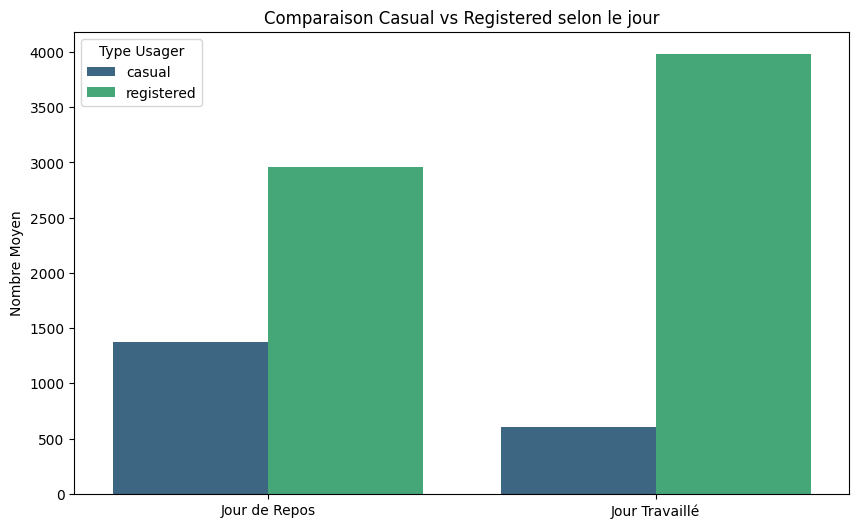

In [27]:
#affichage casual et registered selon jour travaillé

#Calcul des moyennes pour les deux colonnes
data_workingday = data5.groupby('workingday')[['casual', 'registered']].mean().reset_index()

workingday_noms = {
    0: 'Jour de Repos',
    1: 'Jour Travaillé'
}
data_workingday['travail'] = data_workingday['workingday'].map(workingday_noms)


data_melted = data_workingday.melt(
    id_vars=['travail'],
    value_vars=['casual', 'registered'],
    var_name='Type Usager',
    value_name='Nombre Moyen'
)

#Graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data_melted,
    x='travail',
    y='Nombre Moyen',
    hue='Type Usager',
    palette='viridis'
)

plt.title('Comparaison Casual vs Registered selon le jour')
plt.xlabel('')
plt.savefig("cas_reg_workday.png")
plt.show()

In [28]:
#alcul des statistiques
tableau_stats = data5[['casual', 'registered', 'cnt']].describe()
print(tableau_stats.round(2))

        casual  registered      cnt
count   731.00      731.00   731.00
mean    848.53     3660.11  4508.64
std     686.25     1554.69  1930.73
min       9.00      416.00   431.00
25%     315.50     2503.50  3161.00
50%     713.00     3662.00  4548.00
75%    1096.00     4776.50  5956.00
max    3410.00     6946.00  8714.00


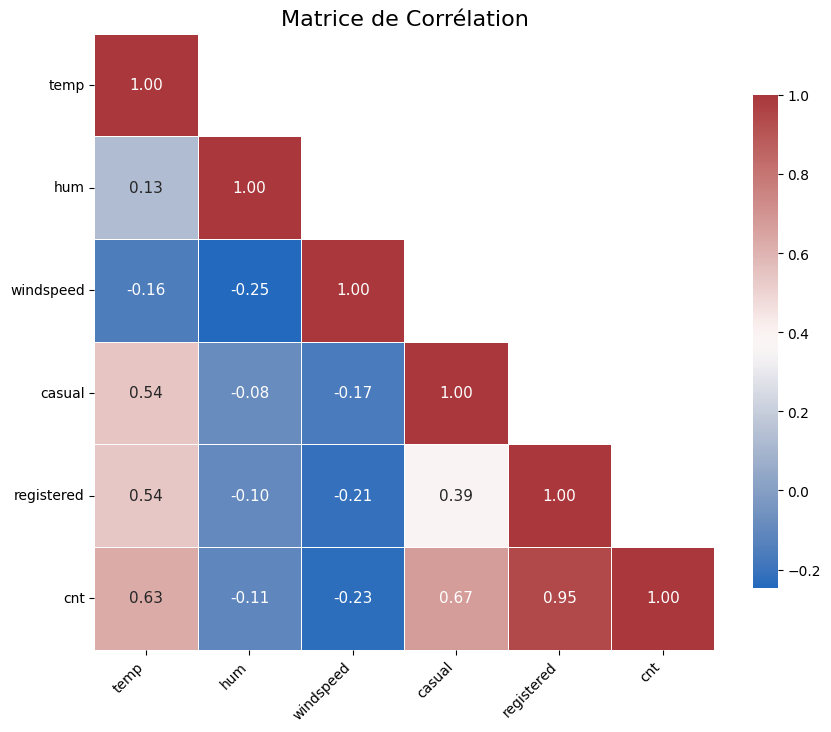

In [29]:
#Matrice de corrélation 1
cols_analyse = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

corr_matrix = data5[cols_analyse].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='vlag',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"fontsize": 11},
    cbar_kws={"shrink": 0.8}
)
plt.title('Matrice de Corrélation', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig("corr1.png")
plt.show()



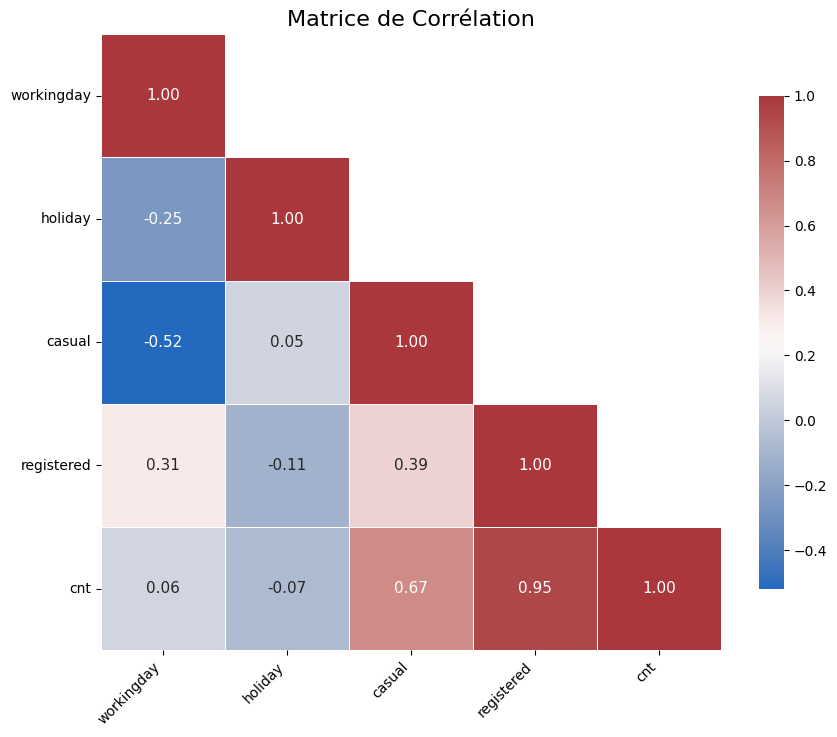

In [30]:
# Matrice de corrélation 2
cols_analyse = ['workingday','holiday', 'casual', 'registered', 'cnt']

corr_matrix = data5[cols_analyse].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='vlag',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"fontsize": 11},
    cbar_kws={"shrink": 0.8}
)
plt.title('Matrice de Corrélation', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('corr2.png')
plt.show()